# `CIFAR10` Image Classification Challenge (Version-0.4.1) Image Augmentation

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
try:
  %tensorflow_version 2.x
except:
  pass

import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as tf_hub

TensorFlow 2.x selected.


In [0]:
from matplotlib import pyplot as plt
from matplotlib import style
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
import glob
import logging
import math
import numpy as np
import os
import pandas as pd
import shutil
import urllib3

In [0]:
logger = tf.get_logger()

In [0]:
logger.setLevel(logging.ERROR)
style.use('ggplot')
tfds.disable_progress_bar()
urllib3.disable_warnings(category=urllib3.exceptions.InsecureRequestWarning)

In [7]:
splitting = tfds.Split.ALL.subsplit(weighted=(70, 20, 10))
splitting

(NamedSplitAll()(tfds.percent[0:70]),
 NamedSplitAll()(tfds.percent[70:90]),
 NamedSplitAll()(tfds.percent[90:100]))

In [8]:
dataset_cifar10, dataset_info = tfds.load(
    name='cifar10', split=splitting, as_supervised=True, with_info=True)

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/1.0.2. Subsequent calls will reuse this data.


In [9]:
X = tf.constant([[True,  False], [True, True], [True, False]])
print(X)

tf.Tensor(
[[ True False]
 [ True  True]
 [ True False]], shape=(3, 2), dtype=bool)


In [10]:
print(tf.reduce_all(input_tensor=X, axis=None, keepdims=True))
print(tf.reduce_all(input_tensor=X, axis=0, keepdims=True))
print(tf.reduce_all(input_tensor=X, axis=1, keepdims=True))

tf.Tensor([[False]], shape=(1, 1), dtype=bool)
tf.Tensor([[ True False]], shape=(1, 2), dtype=bool)
tf.Tensor(
[[False]
 [ True]
 [False]], shape=(3, 1), dtype=bool)


### Broadcasting

In [11]:
x1 = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
x2 = np.array([10])

print(x1)
print(x2, '\n')
print(x1 * x2)

print()

x1 = np.array([[1, 2, 3, 4], [5, 6, 7]])
x2 = np.array([10])

print(x1)
print(x2, '\n')
print(x1 * x2)

print()

x1 = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
x2 = np.array([[10], [15]])

print(x1)
print(x2, '\n')
print(x1 * x2)

print()

x1 = np.array([[1, 2, 3, 4], [5, 6, 7]])
x2 = np.array([[10]])

print(x1)
print(x2, '\n')
print(x1 * x2)

[[1 2 3 4]
 [5 6 7 8]]
[10] 

[[10 20 30 40]
 [50 60 70 80]]

[list([1, 2, 3, 4]) list([5, 6, 7])]
[10] 

[list([1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4])
 list([5, 6, 7, 5, 6, 7, 5, 6, 7, 5, 6, 7, 5, 6, 7, 5, 6, 7, 5, 6, 7, 5, 6, 7, 5, 6, 7, 5, 6, 7])]

[[1 2 3 4]
 [5 6 7 8]]
[[10]
 [15]] 

[[ 10  20  30  40]
 [ 75  90 105 120]]

[list([1, 2, 3, 4]) list([5, 6, 7])]
[[10]] 

[[list([1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4])
  list([5, 6, 7, 5, 6, 7, 5, 6, 7, 5, 6, 7, 5, 6, 7, 5, 6, 7, 5, 6, 7, 5, 6, 7, 5, 6, 7, 5, 6, 7])]]


In [0]:
training_dataset, validation_dataset, test_dataset = dataset_cifar10

Learning image augmentation by loading the dataset, additional references : [here](https://stackoverflow.com/questions/55141076/how-to-apply-data-augmentation-in-tensorflow-2-0-after-tfds-load).

In [0]:
exp_1_dummy = training_dataset.take(count=1)

In [0]:
for img, lab in exp_1_dummy:
  break

In [15]:
print(img)
print(lab)

tf.Tensor(
[[[ 97 109  91]
  [ 97 113  93]
  [ 91 114  89]
  ...
  [ 59  77  84]
  [ 44  60  63]
  [ 43  55  59]]

 [[100 112  97]
  [ 97 111  95]
  [ 86 110  85]
  ...
  [ 47  62  67]
  [ 49  65  72]
  [ 56  69  80]]

 [[100 115 100]
  [ 99 113 105]
  [ 87 111  95]
  ...
  [ 46  61  65]
  [ 51  69  76]
  [ 63  79  89]]

 ...

 [[119 129 134]
  [110 121 123]
  [107 120 120]
  ...
  [ 98 123 129]
  [119 140 164]
  [124 147 175]]

 [[116 127 128]
  [111 124 129]
  [106 121 124]
  ...
  [113 146 165]
  [117 144 171]
  [114 138 158]]

 [[104 115 111]
  [104 116 114]
  [105 124 125]
  ...
  [129 163 192]
  [128 157 189]
  [118 141 163]]], shape=(32, 32, 3), dtype=uint8)
tf.Tensor(2, shape=(), dtype=int64)


In [0]:
def plot_images(images_arr):
  fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(12, 12))
  axes = axes.flatten()

  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.grid(False)
  
  plt.tight_layout()
  plt.show()

Before `repeat()` ...

In [17]:
exp_1_dummy = test_dataset.take(count=1)
print(exp_1_dummy)

<TakeDataset shapes: ((32, 32, 3), ()), types: (tf.uint8, tf.int64)>


In [18]:
for img_lab in exp_1_dummy:
  print(img_lab)

(<tf.Tensor: id=120507, shape=(32, 32, 3), dtype=uint8, numpy=
array([[[  1,  16,   5],
        [  6,  21,  10],
        [  6,  22,  11],
        ...,
        [  2,   7,   1],
        [  2,   7,   1],
        [  0,   5,   0]],

       [[  2,  17,   6],
        [ 11,  27,  17],
        [ 10,  26,  15],
        ...,
        [  2,   7,   1],
        [  2,   7,   1],
        [  0,   5,   0]],

       [[  4,  20,   9],
        [ 11,  27,  16],
        [  5,  20,   9],
        ...,
        [  1,   6,   0],
        [  2,   7,   1],
        [  1,   6,   0]],

       ...,

       [[ 93,  85,  61],
        [ 78,  68,  43],
        [ 60,  55,  34],
        ...,
        [ 54,  51,  42],
        [ 41,  39,  31],
        [ 48,  45,  36]],

       [[102,  93,  69],
        [ 91,  79,  53],
        [ 73,  67,  46],
        ...,
        [ 58,  55,  45],
        [ 34,  31,  23],
        [ 23,  20,  11]],

       [[ 99,  90,  66],
        [ 89,  78,  52],
        [ 81,  76,  54],
        ...,
        [ 6

After `repeat()` ...

In [19]:
exp_1_dummy = test_dataset.take(count=1)
print(exp_1_dummy)

<TakeDataset shapes: ((32, 32, 3), ()), types: (tf.uint8, tf.int64)>


In [20]:
exp_1_dummy = exp_1_dummy.repeat(count=2)
print(exp_1_dummy)

<RepeatDataset shapes: ((32, 32, 3), ()), types: (tf.uint8, tf.int64)>


In [21]:
for img_lab in exp_1_dummy:
  print(img_lab)

(<tf.Tensor: id=120518, shape=(32, 32, 3), dtype=uint8, numpy=
array([[[  1,  16,   5],
        [  6,  21,  10],
        [  6,  22,  11],
        ...,
        [  2,   7,   1],
        [  2,   7,   1],
        [  0,   5,   0]],

       [[  2,  17,   6],
        [ 11,  27,  17],
        [ 10,  26,  15],
        ...,
        [  2,   7,   1],
        [  2,   7,   1],
        [  0,   5,   0]],

       [[  4,  20,   9],
        [ 11,  27,  16],
        [  5,  20,   9],
        ...,
        [  1,   6,   0],
        [  2,   7,   1],
        [  1,   6,   0]],

       ...,

       [[ 93,  85,  61],
        [ 78,  68,  43],
        [ 60,  55,  34],
        ...,
        [ 54,  51,  42],
        [ 41,  39,  31],
        [ 48,  45,  36]],

       [[102,  93,  69],
        [ 91,  79,  53],
        [ 73,  67,  46],
        ...,
        [ 58,  55,  45],
        [ 34,  31,  23],
        [ 23,  20,  11]],

       [[ 99,  90,  66],
        [ 89,  78,  52],
        [ 81,  76,  54],
        ...,
        [ 6

In [22]:
exp_1_dummy = test_dataset.take(count=1)
print(exp_1_dummy)

<TakeDataset shapes: ((32, 32, 3), ()), types: (tf.uint8, tf.int64)>


In [23]:
exp_1_dummy = exp_1_dummy.repeat(count=6)
print(exp_1_dummy)

<RepeatDataset shapes: ((32, 32, 3), ()), types: (tf.uint8, tf.int64)>


In [24]:
len_exp_1_dummy = 0

for i in exp_1_dummy:
  len_exp_1_dummy += 1

print(len_exp_1_dummy)

6


In [25]:
images = [img_lab[0] for img_lab in exp_1_dummy]
print(len(images))

6


In [26]:
f"Hello World : {len(images)}"

'Hello World : 6'

In [27]:
for i in range(len(images)):
  for j in range(i, len(images)):
    print(f"Iteration : ({i}, {j}) ==> {tf.reduce_all(input_tensor=tf.equal(x=images[i], y=images[j]))}")

Iteration : (0, 0) ==> True
Iteration : (0, 1) ==> True
Iteration : (0, 2) ==> True
Iteration : (0, 3) ==> True
Iteration : (0, 4) ==> True
Iteration : (0, 5) ==> True
Iteration : (1, 1) ==> True
Iteration : (1, 2) ==> True
Iteration : (1, 3) ==> True
Iteration : (1, 4) ==> True
Iteration : (1, 5) ==> True
Iteration : (2, 2) ==> True
Iteration : (2, 3) ==> True
Iteration : (2, 4) ==> True
Iteration : (2, 5) ==> True
Iteration : (3, 3) ==> True
Iteration : (3, 4) ==> True
Iteration : (3, 5) ==> True
Iteration : (4, 4) ==> True
Iteration : (4, 5) ==> True
Iteration : (5, 5) ==> True


What does `tf.data.Dataset.repeat(count=None)` do? 

Well it just copies the dataset `count` times and returns the dataset.

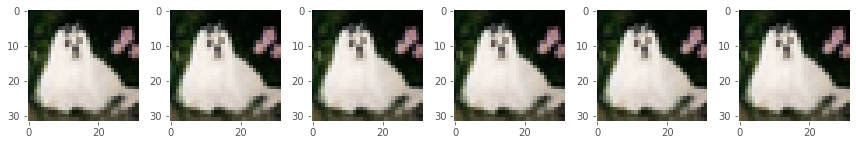

In [28]:
plot_images(images_arr=images)

In [29]:
exp_1_dummy = test_dataset.take(count=1)
print(exp_1_dummy)

<TakeDataset shapes: ((32, 32, 3), ()), types: (tf.uint8, tf.int64)>


In [0]:
exp_1_dummy = exp_1_dummy.map(map_func=lambda image, label: (tf.image.random_flip_left_right(image=image), label))
exp_1_dummy = exp_1_dummy.map(map_func=lambda image, label: (tf.image.random_contrast(image=image, lower=0.5, upper=1.5), label))
exp_1_dummy = exp_1_dummy.repeat(count=6)

In [31]:
images = [img_lab[0] for img_lab in exp_1_dummy]
print(len(images))

6


In [32]:
for i in range(len(images)):
  for j in range(i, len(images)):
    print(f"Iteration : ({i}, {j}) ==> {tf.reduce_all(input_tensor=tf.equal(images[i], images[j]))}")

Iteration : (0, 0) ==> True
Iteration : (0, 1) ==> False
Iteration : (0, 2) ==> False
Iteration : (0, 3) ==> False
Iteration : (0, 4) ==> False
Iteration : (0, 5) ==> False
Iteration : (1, 1) ==> True
Iteration : (1, 2) ==> False
Iteration : (1, 3) ==> False
Iteration : (1, 4) ==> False
Iteration : (1, 5) ==> False
Iteration : (2, 2) ==> True
Iteration : (2, 3) ==> False
Iteration : (2, 4) ==> False
Iteration : (2, 5) ==> False
Iteration : (3, 3) ==> True
Iteration : (3, 4) ==> False
Iteration : (3, 5) ==> False
Iteration : (4, 4) ==> True
Iteration : (4, 5) ==> False
Iteration : (5, 5) ==> True


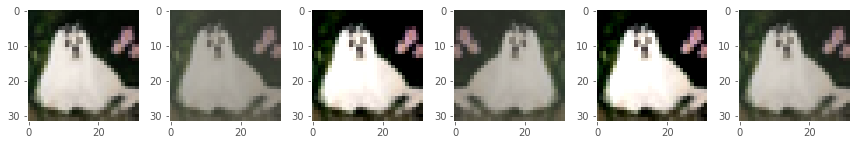

In [33]:
plot_images(images_arr=images)